In [24]:
from scipy.io import loadmat
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
data = loadmat('/kaggle/input/letters/emnist-letters.mat')

In [2]:
train_images = data['dataset']['train'][0][0]['images'][0][0]
train_labels = data['dataset']['train'][0][0]['labels'][0][0]
test_images = data['dataset']['test'][0][0]['images'][0][0]
test_labels = data['dataset']['test'][0][0]['labels'][0][0]

In [3]:
train_images = train_images.reshape(-1, 28, 28)
test_images  = test_images.reshape(-1, 28, 28)

train_images = train_images.reshape(train_images.shape[0], -1)
test_images  = test_images.reshape(test_images.shape[0], -1)

np.save('X_train.npy', train_images.astype('uint8'))
np.save('y_train.npy', train_labels.ravel().astype('uint8'))
np.save('X_test.npy',  test_images.astype('uint8'))
np.save('y_test.npy',  test_labels.ravel().astype('uint8'))

In [4]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test  = np.load('X_test.npy')
y_test  = np.load('y_test.npy')

In [5]:
print(X_train.shape)
print(y_train.shape)

(124800, 784)
(124800,)


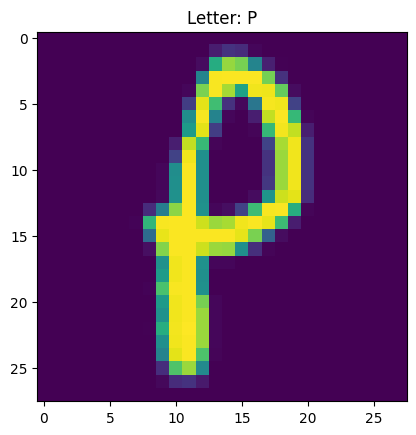

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2].reshape(28,28).T, cmap='viridis', origin='upper')
plt.title(f"Letter: {chr(y_train[2] + 64)}")  # converts 1→A, 2→B, etc.
plt.show()

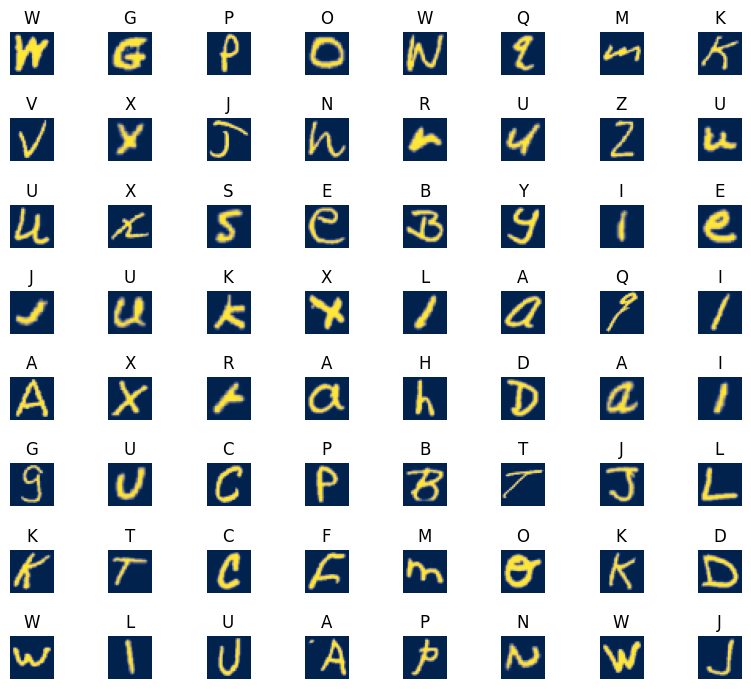

In [7]:
import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)

fig,axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect =[0,0.03,1,0.91])
for i,ax in enumerate(axes.flat):
    X_reshaped = X_train[i].reshape(28,28).T
    ax.imshow(X_reshaped,cmap = 'cividis')
    ax.set_title(chr(y_train[i]+64))
    ax.set_axis_off()

In [8]:
print(X_train.shape)
print(y_train.shape)

(124800, 784)
(124800,)



 # **Testing**

In [16]:

X_train_norm = X_train / 255.0
X_test_norm  = X_test  / 255.0

# Shift labels from 1-26 to 0-25
y_train_shift = y_train - 1
y_test_shift  = y_test - 1


model = Sequential([
    Input(shape=(784,)),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(26) 
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [19]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model.fit(
    X_train_norm, y_train_shift,
    validation_split=0.1,
    epochs=100,
    batch_size=128,
    callbacks=[early_stop]
)

test_loss, test_acc = model.evaluate(X_test_norm, y_test_shift)
print("Test accuracy:", test_acc)


Epoch 1/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9020 - loss: 0.2939 - val_accuracy: 0.9227 - val_loss: 0.2430
Epoch 2/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9018 - loss: 0.2949 - val_accuracy: 0.9230 - val_loss: 0.2378
Epoch 3/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9026 - loss: 0.2954 - val_accuracy: 0.9218 - val_loss: 0.2399
Epoch 4/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9031 - loss: 0.2920 - val_accuracy: 0.9221 - val_loss: 0.2397
Epoch 5/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9029 - loss: 0.2941 - val_accuracy: 0.9239 - val_loss: 0.2406
Epoch 6/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9023 - loss: 0.2885 - val_accuracy: 0.9228 - val_loss: 0.2367
Epoch 7/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9047 - loss: 0.2871 - val_accuracy: 0.9224 - val_loss: 0.2384
Epoch 8/100
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9072 - loss: 0.2817 - val_accu

In [20]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,992 (2.80 MB)

 Trainable params: 244,698 (955.85 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 489,398 (1.87 MB)

# Plotting character

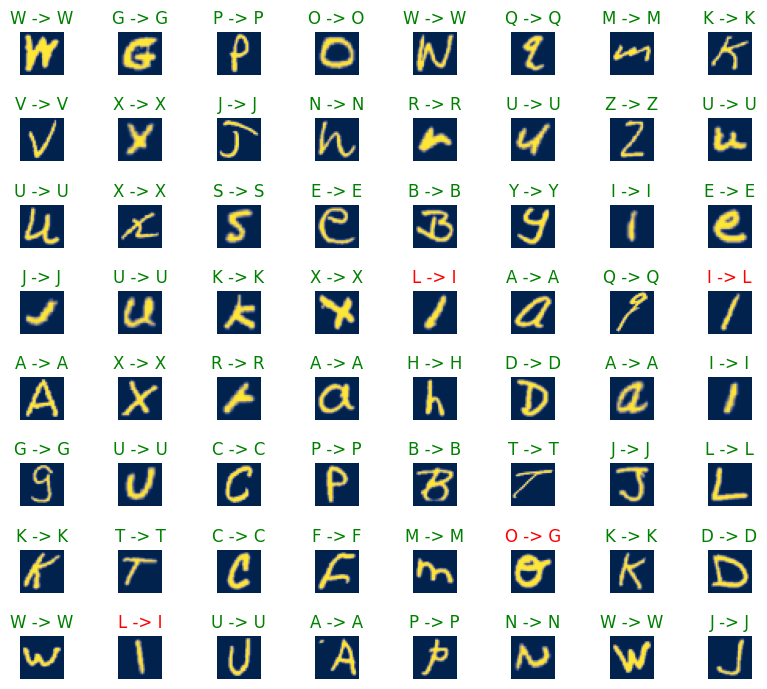

In [21]:

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=1, rect=[0,0.03,1,0.91])

for i, ax in enumerate(axes.flat):
    # Reshape image
    X_reshaped = X_train[i].reshape(28,28).T
    ax.imshow(X_reshaped, cmap='cividis')
    
    # Predict
    prediction = model.predict(X_train_norm[i].reshape(1,784), verbose=0)
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # True and predicted characters
    true_char = chr(y_train_shift[i] + 65)
    pred_char = chr(yhat + 65)
    
    # Title color
    color = 'green' if y_train_shift[i] == yhat else 'red'
    
    # Set title
    ax.set_title(f"{true_char} -> {pred_char}", fontsize=12, color=color)
    ax.set_axis_off()

plt.show()

## Test prediction

In [22]:
train_logits = model.predict(X_train_norm)
y_train_pred = np.argmax(train_logits, axis=1)

test_logits = model.predict(X_test_norm)
y_test_pred = np.argmax(test_logits, axis=1)

train_errors = np.sum(y_train_pred != y_train_shift)
train_accuracy = 100 * np.sum(y_train_pred == y_train_shift) / len(y_train_shift)

test_errors = np.sum(y_test_pred != y_test_shift)
test_accuracy = 100 * np.sum(y_test_pred == y_test_shift) / len(y_test_shift)

print(f"Train errors: {train_errors} / {len(y_train_shift)} ({100-train_accuracy:.2f}% wrong)")
print(f"Test errors:  {test_errors} / {len(y_test_shift)} ({100-test_accuracy:.2f}% wrong)")


3900/3900 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train errors: 6497 / 124800 (5.21% wrong)
Test errors:  1661 / 20800 (7.99% wrong)


In [23]:
from pathlib import Path

model.save('100epoch_92%accuracy_model.keras')

After looking at Training and Test error We can say The model is overfitting , Because there is a huge gap in training and test error. 
It means it's working good in Training dataset but not so good in test set

### Model Diagnosis: 

After examining the training and test performance:

The model is **not so overfitting** upps  

**Reason:**  
almost **7%** gap between **Training Error** (very low) and **Test Error** (very close)

**means:**  
- Performs **well** on the training dataset  
- Performs **almost good not overfitted** on the unseen test set  

The model has memorized the training samples .

## Final Verdict 

The model ain’t perfect…  
but damn,
- **92.05% accuracy** on handwritten letters  

That’s straight-up **clean**   

- 9 out of 10 times it just looks at some messy handwriting and goes:  
“Yeah bro It's A or B” → and it’s right"

I will try to increase accuracy in the future.

## Absolute legend for sticking till the end 🔥
### Thank you